In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import os
import os.path
from os import path
import cv2
import json
import numpy as np
from glob import glob

In [4]:
data_root = './drive/MyDrive/NAS/CSED538/DL20'
print(path.exists(data_root))

True


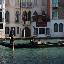

(64, 64, 3)


In [5]:
from google.colab.patches import cv2_imshow

example = os.path.join(data_root, 'train', '0', '101.png')
image = cv2.imread(example)
cv2_imshow(image)
print(np.shape(image))

In [25]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import glob
from PIL import Image
import matplotlib.pyplot as plt

class LoadDataset(Dataset):
    def __init__(self, data_path, transform, mode='train'):
        super(LoadDataset, self).__init__()
        self.data_path = data_path
        self.mode = mode
        self.transform = transform
        
        if mode == "test":
            self.test_load()
        else : 
            self.load_dataset()

    def test_load(self):
        root = os.path.join(self.data_path, self.mode)
        print("root : ", root)
        self.data = glob.glob(root+"/*.png")
        
    def load_dataset(self):
        root = os.path.join(self.data_path, self.mode)
        print("root : ", root)
        self.data = ImageFolder(root=root)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if self.mode == "test":
            img = Image.open(self.data[index]).convert('RGB')
            img = self.transform(img)
            return img
        else:
            img, label = self.data[index]
            img, label = self.transform(img), int(label)
            return img, label

In [26]:
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = LoadDataset(data_root, transform)
dataloader = DataLoader(dataset, batch_size=4, pin_memory=True, shuffle=True)

root :  ./drive/MyDrive/NAS/CSED538/DL20/train


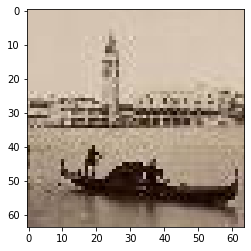

torch.Size([3, 64, 64])
tensor(0)


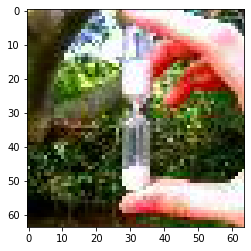

torch.Size([3, 64, 64])
tensor(1)


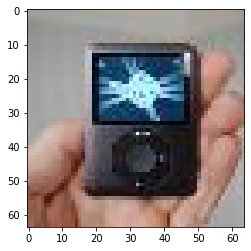

torch.Size([3, 64, 64])
tensor(2)


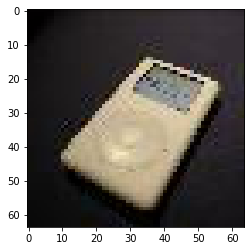

torch.Size([3, 64, 64])
tensor(2)


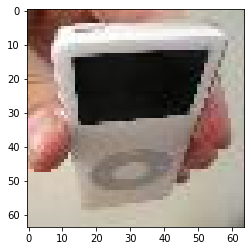

torch.Size([3, 64, 64])
tensor(2)


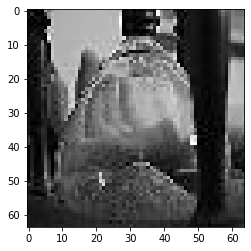

torch.Size([3, 64, 64])
tensor(1)


In [30]:
for i, (image, label) in enumerate(dataloader):
  if i > 5:
    break
  plt.imshow( image[0].permute(1, 2, 0) )
  plt.show()
  print(image[0].size())
  print(label[0])